In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

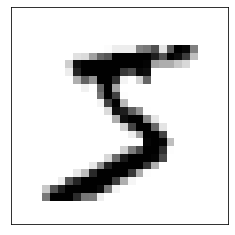

In [6]:
plt.imshow(train_images[0],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [7]:
train_labels[0]

5

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [9]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [10]:
train_images /= 255
test_images /= 255

In [11]:
train_images.shape

(60000, 28, 28, 1)

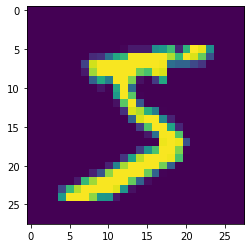

In [13]:
plt.imshow(train_images[0])

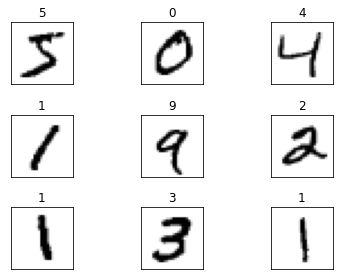

In [14]:
for i in range(9): # 0-9
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i],cmap='gray_r')
    plt.title(train_labels[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()    
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [18]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=10,validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 61s 12ms/step - loss: 0.1325 - accuracy: 0.9588 - val_loss: 0.0659 - val_accuracy: 0.9822
Epoch 2/5
4800/4800 [==============================] - 56s 12ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.0521 - val_accuracy: 0.9851
Epoch 3/5
4800/4800 [==============================] - 56s 12ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0452 - val_accuracy: 0.9859
Epoch 4/5
4800/4800 [==============================] - 57s 12ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0399 - val_accuracy: 0.9899
Epoch 5/5
4800/4800 [==============================] - 57s 12ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0458 - val_accuracy: 0.9896


In [19]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0392 - accuracy: 0.9900


[0.03915978968143463, 0.9900000095367432]

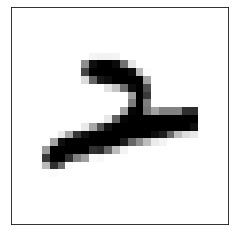

In [25]:
plt.imshow(test_images[4656],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [21]:
model.predict(test_images[4444].reshape(1,28,28,1)).round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
np.argmax(model.predict(test_images[4444].reshape(1,28,28,1)))

9